<a href="https://colab.research.google.com/github/Ain0708/google-colab/blob/main/%EC%97%90%EC%9D%B4%EB%8B%A4%EB%B0%98_230610_t_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. CVS파일 불러오기



In [ ]:
from google.colab import files
myfile = files.upload()

Saving iris.csv to iris (1).csv


In [ ]:
import pandas as pd
import io

In [ ]:
df = pd.read_csv(io.BytesIO(myfile['iris.csv']))

In [ ]:
df

,species,sepal
0,1,5.1
1,1,4.9
2,1,4.7
3,1,4.6
4,1,5.0
...,...,...
95,2,5.7
96,2,5.7
97,2,6.2
98,2,5.1


2. 두개의 집단으로 분리하기

In [ ]:
from numpy import array

In [ ]:
x1=array(df.sepal[0:50])

In [ ]:
x1

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

In [ ]:
x2=array(df.sepal[50:100])

In [ ]:
x2

array([7. , 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. ,
       6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6,
       6.8, 6.7, 6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6,
       5.5, 5.5, 6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7])

3. 현재 상태를 살펴보기 위해 시각화(그래프로 표현)하기

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Iris Box Plot')

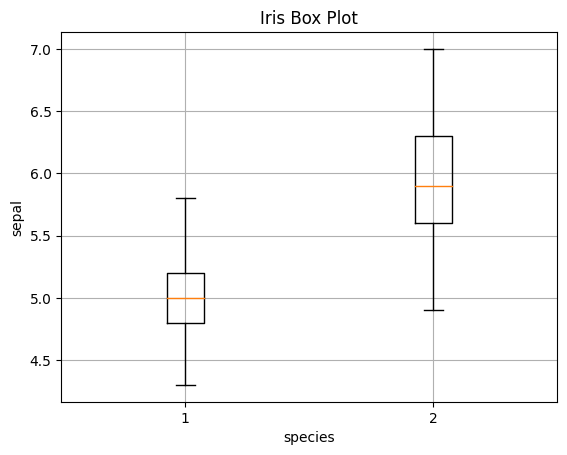

In [ ]:
plt.grid()
plt.boxplot([x1,x2])
plt.xlabel('species')
plt.ylabel('sepal')
plt.title('Iris Box Plot')

4.정규성을 충족하는지 살펴보기

In [ ]:
from scipy.stats import shapiro
#pvalue가 0.05보다 크면 정규성을 만족한다

In [ ]:
shapiro(x1)

ShapiroResult(statistic=0.9776982069015503, pvalue=0.4595010578632355)

In [ ]:
shapiro(x2)

ShapiroResult(statistic=0.9778357148170471, pvalue=0.4647378921508789)

5. 등분산성을 충족하는지 살펴보기

In [ ]:
from scipy.stats import levene
#pvalue가 0.05보다 크면 등분산성을 만족한다.


In [ ]:
levene(x1, x2)

LeveneResult(statistic=8.172720533728683, pvalue=0.005195521631017527)

6. 적절한 t-test 방법을 선택하기


*   정규성 만족, but 등분산성을 만족하지 못하는 경우:Welch's t-test
*   정규성 만족, 등분산성 만족:Student's t-test
*   정규성이 만족되지 않음:Mann-Whitney U-test







In [ ]:
#Welch's t-test
#pvalue가 0.05보다 작으면 두 집단의 평균은 유의미한 차이가 있다.
from scipy.stats import ttest_ind

In [ ]:
ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=-10.52098626754911, pvalue=3.746742613983842e-17)

In [ ]:
#Student's t-test
from scipy.stats import ttest_ind

In [ ]:
ttest_ind(x1,x2)

Ttest_indResult(statistic=-10.52098626754911, pvalue=8.985235037487079e-18)

In [ ]:
#Mann-Whitney U-test
from scipy.stats import mannwhitneyu

In [ ]:
a, b = mannwhitneyu(x1, x2)

In [ ]:
if b<0.05:
  print('두 집단의 평균에 유의미한 차이가 있습니다.')
else:
  print('차이가 없습니다.')

두 집단의 평균에 유의미한 차이가 있습니다.
